# DNA_construct Introduction
DNA_construct is a flexible way to indicate a DNA sequence.

A DNA sequence is composed of a string of nucleotides. The sequence of these nucleotides can allow binding of other biomolecules such as proteins or RNA. We choose to annotate known binding interactions and other features of DNA sequences by considering them to be "DNA parts". a "part" has a certain function, and the order and orientation of parts on a dna sequence describes the overall function of that DNA sequence.

For example, a `Promoter` is a part which binds to RNA polymerase and causes everything downstream to be transcribed into RNA. A `Terminator`, then, is a sequence which stops the transcription of DNA into RNA. Therefore, anything between a `Promoter` and a `Terminator` gets turned into RNA.

Other parts such as a Ribosome Binding Site or `RBS`, binds to the ribosome, but only if it is made of RNA and not DNA. Thus, an `RBS` is _like_ a `Promoter`, but instead of RNA it makes Protein. As always the position and orientation of parts determines what those parts actually do. If your sequence contains a Coding Sequence (`CDS`) _before_ an `RBS`, then the ribosome actually cannot translate that protein. Likewise if your `RBS` is after a `Terminator`, that `RBS` never gets turned into RNA.

This type of logic is incorporated into `DNA_construct`.

The basic workflow is to first define a list of parts, then string them together into a `DNA_construct`

In [1]:
from biocrnpyler import *
import numpy as np
try:
    #dnaplotlib is a cool library for plotting DNAs.
    #please use my fork located at https://github.com/dr3y/dnaplotlib
    #to install it type: pip install git+git://github.com/dr3y/dnaplotlib.git@master
    import dnaplotlib as dpl
    dpl_enabled = True
except (ModuleNotFoundError,ImportError) as e:
    dpl_enabled = False
%matplotlib inline
print("imports done!")


ptet = RegulatedPromoter("ptet",["tetr"],leak=True) #this is a repressible promoter
pconst = Promoter("pconst") #constitutive promoter
utr1 = RBS("UTR1") #regular RBS
gfp = CDS("GFP","GFP")
t16 = Terminator("t16") #a terminator stops transcription


#now that the parts are defined, we can put together our construct.
parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05}

construct_1 = DNA_construct([[ptet,"forward"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"]],mechanisms = {"transcription":Transcription_MM(),"translation":Translation_MM()},parameters=parameters) 
x = construct_1.update_species()
print()
print("CRN species")
print('\n'.join([a.pretty_print() for a in x]))

y = construct_1.update_reactions()
print()
print("CRN reactions")
print('\n'.join([a.pretty_print() for a in y]))



imports done!
[dna_ptet_f_UTR1_f_GFP_f_t16_f, dna_ptet_f_UTR1_f_GFP_f_t16_f, protein_RNAP, dna_ptet_f_UTR1_f_GFP_f_t16_f, rna_UTR1_f_GFP_f_t16_f, OPcomplex_dna_ptet_protein_RNAP_f_UTR1_f_GFP_f_t16_f, protein_tetr, dna_ptet_f_UTR1_f_GFP_f_t16_f, OPcomplex_dna_ptet_protein_tetr_2x_f_UTR1_f_GFP_f_t16_f, OPcomplex_dna_ptet_protein_tetr_2x_f_UTR1_f_GFP_f_t16_f, protein_RNAP, OPcomplex_dna_ptet_protein_tetr_2x_f_UTR1_f_GFP_f_t16_f, rna_UTR1_f_GFP_f_t16_f, OPcomplex_dna_ptet_protein_tetr_2x_protein_RNAP_f_UTR1_f_GFP_f_t16_f]
[rna_UTR1_f_GFP_f_t16_f, ribosome_Ribo, rna_UTR1_f_GFP_f_t16_f, OPcomplex_ribosome_Ribo_rna_UTR1_f_GFP_f_t16_f, protein_GFP]

CRN species
dna[dna[ptet-forward]:dna[UTR1-forward]:dna[GFP-forward]:dna[t16-forward]]
dna[dna[ptet-forward]:dna[UTR1-forward]:dna[GFP-forward]:dna[t16-forward]]
protein[RNAP]
dna[dna[ptet-forward]:dna[UTR1-forward]:dna[GFP-forward]:dna[t16-forward]]
rna[rna[UTR1-forward]:rna[GFP-forward]:rna[t16-forward]]
OPcomplex[complex[dna[ptet]:protein[RNAP]]

imports done!


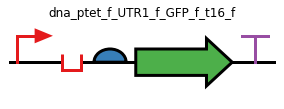

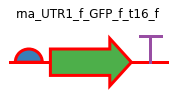

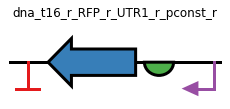

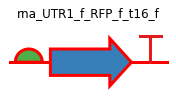

dna = ptet_UTR1_GFP_t16
	ptet_0
	rna = UTR1_GFP_t16
	UTR1_0
	protein = GFP_1
dna = t16_r_RFP_r_UTR1_r_pconst_r
	pconst_3_r
	rna = UTR1_RFP_t16
	UTR1_0
	protein = RFP_1
[dna_ptet_f_UTR1_f_GFP_f_t16_f, dna_ptet_f_UTR1_f_GFP_f_t16_f, protein_RNAP, dna_ptet_f_UTR1_f_GFP_f_t16_f, rna_UTR1_f_GFP_f_t16_f, OPcomplex_dna_ptet_protein_RNAP_f_UTR1_f_GFP_f_t16_f, protein_tetr, dna_ptet_f_UTR1_f_GFP_f_t16_f, OPcomplex_dna_ptet_protein_tetr_f_UTR1_f_GFP_f_t16_f, OPcomplex_dna_ptet_protein_tetr_f_UTR1_f_GFP_f_t16_f, protein_RNAP, OPcomplex_dna_ptet_protein_tetr_f_UTR1_f_GFP_f_t16_f, rna_UTR1_f_GFP_f_t16_f, OPcomplex_complex_dna_ptet_protein_tetr_protein_RNAP_f_UTR1_f_GFP_f_t16_f]
[rna_UTR1_f_GFP_f_t16_f, protein_Ribo, rna_UTR1_f_GFP_f_t16_f, OPcomplex_protein_Ribo_rna_UTR1_f_GFP_f_t16_f, protein_GFP]
[dna_t16_r_RFP_r_UTR1_r_pconst_r, dna_t16_r_RFP_r_UTR1_r_pconst_r, protein_RNAP, dna_t16_r_RFP_r_UTR1_r_pconst_r, rna_UTR1_f_RFP_f_t16_f, OPcomplex_t16_r_RFP_r_UTR1_r_dna_pconst_protein_RNAP_r]
[rna_UTR1

In [2]:
from biocrnpyler import *
import numpy as np
try:
    #dnaplotlib is a cool library for plotting DNAs.
    #please use my fork located at https://github.com/dr3y/dnaplotlib
    #to install it type: pip install git+git://github.com/dr3y/dnaplotlib.git@master
    import dnaplotlib as dpl
    dpl_enabled = True
except (ModuleNotFoundError,ImportError) as e:
    dpl_enabled = False
%matplotlib inline
print("imports done!")

#part definitions below

ptet = RegulatedPromoter("ptet",["tetr"],leak=True) #this is a repressible promoter
pconst = Promoter("pconst") #constitutive promoter
pcomb = CombinatorialPromoter("pcomb",["arac","laci"], leak=False,
                              tx_capable_list = [["arac"], ["laci"]]) #the Combinations A and B or just A or just B be transcribed
utr1 = RBS("UTR1") #regular RBS
utr2 = RBS("UTR1") #regular RBS
gfp = CDS("GFP","GFP") #a CDS has a name and a protein name. so this one is called GFP and the protein is also called GFP
fusrfp = CDS("fusRFP","RFP",no_stop_codons=["forward"]) #you can say that a protein has no stop codon. This is a little different from a fusion protein, because in this case you are saying that the ribosome reads through two proteins but still produces two distinct proteins, rather than one fused protein. This can happen in the case of the ta peptide which causes a peptide bond not to be formed while making a protein.
rfp = CDS("RFP","RFP") #regular RFP
t16 = Terminator("t16") #a terminator stops transcription


#now that the parts are defined, we can put together our construct.
construct_1 = DNA_construct([[ptet,"forward"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"]])
construct_2 = DNA_construct([[t16,"reverse"],[rfp,"reverse"],[utr2,"reverse"],[pconst,"reverse"]])
#now, we are using dnaplotlib to plot the constructs


if(dpl_enabled):
    plotConstruct(construct_1,debug=False,plot_rnas=True)
    plotConstruct(construct_2,debug=False,plot_rnas=True)
print(construct_1)
print(construct_2)

#some very basic parameters are defined
parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05}

components = [construct_1,construct_2]
myMixture = TxTlExtract(name = "txtl", parameters = parameters, components = components, parameter_warnings = False)
myCRN = myMixture.compile_crn()



You can see that for the first construct, your DNA is given an automatic name: `pconst_UTR1_GFP_t16`. 

The RNA made from your DNA is also given an automatic name: `UTR1_GFP_t16`

Likewise for the second construct, which I've made in reverse to make the difference more apparent. Though you'll see that the RNA from the second construct is still produced in the right orientation, so the RNA is shown in the forwards direction.

This is because DNA and RNA are now represented as an OrderedComplexSpecies. Each member of the OrderedComplexSpecies represents a part. So, in the case of promoters or RBSes, you'll see ribosomes and polymerases bind directly to the part inside the OrderedComplexSpecies.

Loading BokehJS ...

D:\anaconda3\lib\site-packages\bokeh\models\graphs.py:164: UserWarning: Node keys in 'layout_function' don't match node keys in the graph. These nodes may not be displayed correctly.
  warn("Node keys in 'layout_function' don't match node keys in the graph. "


D:\anaconda3\lib\site-packages\html5lib\_trie\_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
D:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\anaconda3\lib\site-packages\bioscrape\sbmlutil.py:209: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +
d:\documents\github\biocrnpyler\biocrnpyler\chemical_reaction_network.py:339: UserWarning: Trying to set species that is not in model: protein_arac
  m.set_species(initial_condition_dic

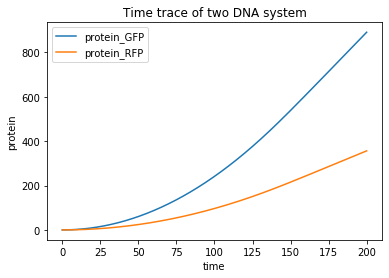

In [3]:
#here we are plotting the network diagram and simulating the system with some basic parameters

try:
    from bokeh.models import (Plot , Range1d)
    import bokeh.plotting
    import bokeh.io
    bokeh.io.output_notebook() #this makes the graph appear in line with the notebook
    colordict={"complex":"cyan","protein":"green",
                "GFP":"lightgreen",
                "RFP":"red",
                "ribosome":"blue",
                "dna":"white","rna":"orange",
                "ligand":"pink","phosphate":"yellow","nothing":"purple"}
    layout_str = "force"
    #print("one construct")
    DG, DGspec, DGrxn = generate_networkx_graph(myCRN,use_pretty_print=True,colordict=colordict) #this creates the networkx objects
    plot = Plot(plot_width=500, plot_height=500, x_range=Range1d(-500, 500), y_range=Range1d(-500, 500)) #this generates a 
    graphPlot(DG,DGspec,DGrxn,plot,layout=layout_str,posscale=1) #now you draw the network on the plot. Layout "force" is 
    bokeh.io.show(plot) #if you don't type this the plot won't show

    ''
    timepoints = np.linspace(0, 200, 1000)
    x0 = {str(construct_1.get_species()):5.0,
    str(construct_2.get_species()):2.0, "protein_RNAP":10., "protein_Ribo":50.,"protein_arac":20}
    Re1 = myCRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = x0)
    plt.plot(timepoints,Re1["protein_GFP"], label = "protein_GFP")
    plt.plot(timepoints,Re1["protein_RFP"], label = "protein_RFP")
    #plt.plot(timepoints,Re1["rna_mydna"], label = "rna_mydna")
    #plt.gca().set_yscale("log")
    plt.title("Time trace of two DNA system")
    plt.xlabel("time")
    plt.ylabel("protein")
    plt.legend()
    #'''
except ModuleNotFoundError:
    pass

That seems pretty straightforward but now let's see what happens if we put both on the same piece of DNA:



(pcomb_0, UTR1_1, GFP_2, t16_3, t16_4_r, RFP_5_r, UTR1_6_r, pconst_7_r)


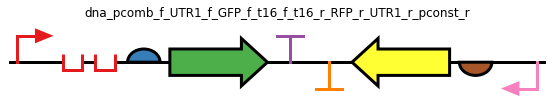

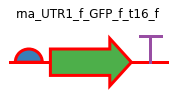

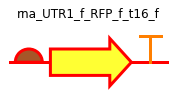

dna = pcomb_UTR1_GFP_t16_t16_r_RFP_r_UTR1_r_pconst_r
	pcomb_0
	rna = UTR1_GFP_t16
	UTR1_0
	protein = GFP_1
	pconst_7_r
	rna = UTR1_RFP_t16
	UTR1_0
	protein = RFP_1
[dna_pcomb_f_UTR1_f_GFP_f_t16_f_t16_r_RFP_r_UTR1_r_pconst_r, dna_pcomb_f_UTR1_f_GFP_f_t16_f_t16_r_RFP_r_UTR1_r_pconst_r, protein_arac, protein_laci, OPcomplex_dna_pcomb_protein_arac_2x_f_UTR1_f_GFP_f_t16_f_t16_r_RFP_r_UTR1_r_pconst_r, protein_RNAP, OPcomplex_dna_pcomb_protein_arac_2x_f_UTR1_f_GFP_f_t16_f_t16_r_RFP_r_UTR1_r_pconst_r, rna_UTR1_f_GFP_f_t16_f, OPcomplex_complex_dna_pcomb_protein_arac_2x_protein_RNAP_f_UTR1_f_GFP_f_t16_f_t16_r_RFP_r_UTR1_r_pconst_r, OPcomplex_dna_pcomb_protein_laci_2x_f_UTR1_f_GFP_f_t16_f_t16_r_RFP_r_UTR1_r_pconst_r, protein_RNAP, OPcomplex_dna_pcomb_protein_laci_2x_f_UTR1_f_GFP_f_t16_f_t16_r_RFP_r_UTR1_r_pconst_r, rna_UTR1_f_GFP_f_t16_f, OPcomplex_complex_dna_pcomb_protein_laci_2x_protein_RNAP_f_UTR1_f_GFP_f_t16_f_t16_r_RFP_r_UTR1_r_pconst_r, OPcomplex_dna_pcomb_protein_arac_2x_f_UTR1_f_GFP_f_t1

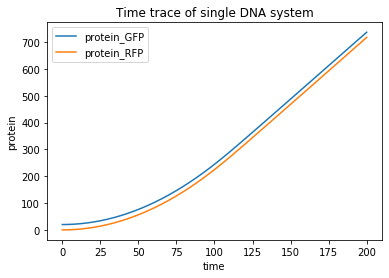

In [4]:
construct_3 = DNA_construct([[pcomb,"forward"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"],[t16,"reverse"],[rfp,"reverse"],[utr1,"reverse"],[pconst,"reverse"]])
print(construct_3.parts_list)
#now, we are using dnaplotlib to plot the constructs

if(dpl_enabled):
    plotConstruct(construct_3,debug=False,plot_rnas=True)
print(construct_3)

#some very basic parameters are defined
parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05}

components = [construct_3]
myMixture = TxTlExtract(name = "txtl", parameters = parameters, components = components, parameter_warnings = False)
myCRN = myMixture.compile_crn()
try:
    timepoints = np.linspace(0, 200, 1000)
    x0 = {str(construct_3.get_species()):5.0, "protein_GFP":20,"protein_RNAP":10., "protein_Ribo":50.,"protein_arac":20}
    #I started the GFP at a slightly elevated value so you can see the two lines on top of each other in the graph
    Re1 = myCRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = x0)
    plt.plot(timepoints,Re1["protein_GFP"], label = "protein_GFP")
    plt.plot(timepoints,Re1["protein_RFP"], label = "protein_RFP")
    #plt.plot(timepoints,Re1["rna_mydna"], label = "rna_mydna")
    #plt.gca().set_yscale("log")
    plt.title("Time trace of single DNA system")
    plt.xlabel("time")
    plt.ylabel("protein")
    plt.legend()
    #'''
except ModuleNotFoundError:
    pass


The same RNAs and proteins are made, but the network diagram should be a bit more complicated, owing to the combinatorial binding to the DNA molecule

In [5]:
try:
    from bokeh.models import (Plot , Range1d)
    import bokeh.plotting
    import bokeh.io
    bokeh.io.output_notebook() #this makes the graph appear in line with the notebook
    colordict={"complex":"cyan","protein":"green",
                "GFP":"lightgreen",
                "RFP":"red",
                "ribosome":"blue",
                "dna":"white","rna":"orange",
                "ligand":"pink","phosphate":"yellow","nothing":"purple"}
    layout_str = "force"
    #print("one construct")
    DG, DGspec, DGrxn = generate_networkx_graph(myCRN,use_pretty_print=True,colordict=colordict) #this creates the networkx objects
    plot = Plot(plot_width=500, plot_height=500, x_range=Range1d(-500, 500), y_range=Range1d(-500, 500)) #this generates a 
    graphPlot(DG,DGspec,DGrxn,plot,layout=layout_str,posscale=1) #now you draw the network on the plot. Layout "force" is 
    bokeh.io.show(plot) #if you don't type this the plot won't show
except ModuleNotFoundError:
    pass

Loading BokehJS ...

D:\anaconda3\lib\site-packages\bokeh\models\graphs.py:164: UserWarning: Node keys in 'layout_function' don't match node keys in the graph. These nodes may not be displayed correctly.
  warn("Node keys in 'layout_function' don't match node keys in the graph. "


Now you can see that two arrows lead to each RNA. But there is still only one promoter per RNA, how can it be? Well, now that both promoters and transcripts are on the same DNA, we must take into account the fact that you can have both promoters with RNA polymerase bound, so for example Promoter1 can lead to RNA1 whether or not Promoter2 is bound by RNAP.

We can even make a more complicated DNA construct, such as what happens before and after a promoter is "flipped" by integrase activity

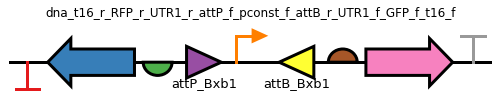

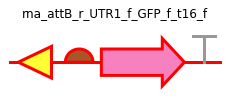

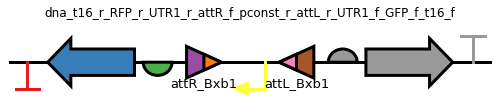

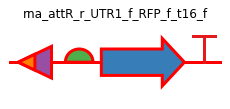

dna = t16_r_RFP_r_UTR1_r_attP_pconst_attB_r_UTR1_GFP_t16
	pconst_4
	rna = attB_r_UTR1_GFP_t16
	UTR1_1
	protein = GFP_2
dna = t16_r_RFP_r_UTR1_r_attR_pconst_r_attL_r_UTR1_GFP_t16
	pconst_4_r
	rna = attR_r_UTR1_RFP_t16
	UTR1_1
	protein = RFP_2
[dna_t16_r_RFP_r_UTR1_r_attP_f_pconst_f_attB_r_UTR1_f_GFP_f_t16_f, protein_Bxb1, protein_Bxb1, dna_t16_r_RFP_r_UTR1_r_attP_f_pconst_f_attB_r_UTR1_f_GFP_f_t16_f, OPcomplex_t16_r_RFP_r_UTR1_r_dna_attP_protein_Bxb1_2x_f_pconst_f_attB_r_UTR1_f_GFP_f_t16_f, dna_t16_r_RFP_r_UTR1_r_attP_f_pconst_f_attB_r_UTR1_f_GFP_f_t16_f, protein_RNAP, dna_t16_r_RFP_r_UTR1_r_attP_f_pconst_f_attB_r_UTR1_f_GFP_f_t16_f, rna_attB_r_UTR1_f_GFP_f_t16_f, OPcomplex_t16_r_RFP_r_UTR1_r_attP_f_dna_pconst_protein_RNAP_f_attB_r_UTR1_f_GFP_f_t16_f, protein_Bxb1, protein_Bxb1, dna_t16_r_RFP_r_UTR1_r_attP_f_pconst_f_attB_r_UTR1_f_GFP_f_t16_f, OPcomplex_t16_r_RFP_r_UTR1_r_attP_f_pconst_f_dna_attB_protein_Bxb1_2x_r_UTR1_f_GFP_f_t16_f]
[rna_attB_r_UTR1_f_GFP_f_t16_f, protein_Ribo, rna_att

In [6]:
attB = AttachmentSite("attB","attB",integrase="Bxb1")
attP = AttachmentSite("attP","attP",integrase="Bxb1")
attL = AttachmentSite("attL","attL",integrase="Bxb1")
attR = AttachmentSite("attR","attR",integrase="Bxb1")


construct_1 = DNA_construct([[t16,"reverse"],[rfp,"reverse"],[utr1,"reverse"],[attP,"forward"],[pconst,"forward"],[attB,"reverse"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"]])
construct_2 = DNA_construct([[t16,"reverse"],[rfp,"reverse"],[utr1,"reverse"],[attR,"forward"],[pconst,"reverse"],[attL,"reverse"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"]])
#now, we are using dnaplotlib to plot the constructs

if(dpl_enabled):
    plotConstruct(construct_1,debug=False,plot_rnas=True)
    plotConstruct(construct_2,debug=False,plot_rnas=True)
print(construct_1)
print(construct_2)

#some very basic parameters are defined
parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05}

components = [construct_1,construct_2]
myMixture = TxTlExtract(name = "txtl", parameters = parameters, components = components, parameter_warnings = False)
myCRN = myMixture.compile_crn()

And we can see that this construct 'knows' that a forward facing promoter will not produce RNAs that face the reverse direction.

In [7]:
try:
    from bokeh.models import (Plot , Range1d)
    import bokeh.plotting
    import bokeh.io
    bokeh.io.output_notebook() #this makes the graph appear in line with the notebook
    colordict={"complex":"cyan","protein":"green",
                "GFP":"lightgreen",
                "RFP":"red",
                "ribosome":"blue",
                "dna":"white","rna":"orange",
                "ligand":"pink","phosphate":"yellow","nothing":"purple"}
    layout_str = "force"
    #print("one construct")
    DG, DGspec, DGrxn = generate_networkx_graph(myCRN,use_pretty_print=False,colordict=colordict) #this creates the networkx objects
    plot = Plot(plot_width=500, plot_height=500, x_range=Range1d(-500, 500), y_range=Range1d(-500, 500)) #this generates a 
    graphPlot(DG,DGspec,DGrxn,plot,layout=layout_str,posscale=1) #now you draw the network on the plot. Layout "force" is 
    bokeh.io.show(plot) #if you don't type this the plot won't show
except ModuleNotFoundError:
    pass

Loading BokehJS ...

D:\anaconda3\lib\site-packages\bokeh\models\graphs.py:164: UserWarning: Node keys in 'layout_function' don't match node keys in the graph. These nodes may not be displayed correctly.
  warn("Node keys in 'layout_function' don't match node keys in the graph. "


# Overview for developers
Several key additions had to be made to biocrnpyler to make this possible. 

1. `make_complex()` is a new function that you should use every time you want to make a ComplexSpecies. It should do exactly the same thing as the ComplexSpecies constructor, unless one of the species that you gave it is an OrderedComplexSpecies that has a 'bindloc' attribute, then instead of making a ComplexSpecies the function will make an OrderedComplexSpecies that is correctly formed.

2. `OrderedComplexSpecies` now can have an attribute that starts with 'bindloc'. A piece of DNA with many binding sites is represented as an OrderedComplexSpecies. Because mechanisms and Components are agnostic of binding location; that is to say, they usually have code that looks like this: `make_complex([dna,protein])`, we must give them some way of knowing _where_ on that `dna` the `protein` should end up. This is where the 'bindloc' comes in. A `Component` such as a `Promoter` usually has a data member called `assembly`. This contains, among other things, the `dna` which the `Promoter` should use when making its `Reactions` and `Species`. So now, this data member is seeded with a `dna` that has a binding location baked into it, in the form of an attribute such as "bindloc_5". That means everything that the `Component` generates will be bound into the fifth position of the `OrderedComplexSpecies` that has that attribute.

3. `DNA_part` inherits from `Component`, and every dna part such as `Promoter` now inherits from `DNA_part` instead of `Component`. This allows me to store things like position, direction, and parent construct inside anything that used to be a `Component`

4. `CDS` is a `DNA_part` which gives rise to a `Protein`. It felt weird to put `Protein` objects into a DNA sequence so I created this. It only makes the protein if it is read in the 'forward' direction.

4. `DNA_construct` contains a list of `DNA_part`s together with their directions. `DNA_construct` also has `update_species()` and `update_reactions()` so that it can generate the necessary species and reactions if it will be part of a CRN. Likewise, `RNA_construct` does the same thing for RNA. A `DNA_construct` can give rise to many `RNA_construct`s when it compiles. This is done through the action of `explore_txtl()`

5. `explore_txtl()` is a function of `DNA_construct` which figures out the RNA and Proteins that a DNA produces. It works basically by going along a DNA part by part, remembering which parts came before, and taking into account the directions of parts. In general it will traverse a `DNA_construct` in the "forward" and "reverse" directions. It is hard coded to know that `RBS` parts make proteins and `Promoter` parts make RNAs, but only when their orientation is "forward" relative to the direction it's currently looking at. Other things are taken account too, for example, an `RBS` can only make a `Protein` if it is part of an RNA. Most of this logic is encapsulated in an object called `TxTl_explorer`.

6. `update_components()` is a function of `DNA_construct` which creates many copies of the `DNA_part`s which make up the `DNA_construct`. This is necessary for making all combinatorial complexes. First, every `DNA_part` is fed in an `OrderedComplexSpecies` corresponding to the unbound DNA, which has the appropriate "bindloc_". Then, the `Species` produced by `update_species()` each have complexes in only one location. All possible combinations of bound species are then generated from this set of `OrderedComplexSpecies`. Then, these combinatorial complexes are fed _back_ into the `DNA_part`s, generating a new `DNA_part` that is responsible for generating species and reactions that include that combinatorial complex. For example, if you have  `DNA_construct` containing a `Promoter` and an `AttachmentSite`, then `update_components()` should generate two `Promoter` parts, one that has the unbound `OrderedComplexSpecies` and one that has an `OrderedComplexSpecies` that has integrases bound to it. Then, these new `Component`s can be used to make species and reactions using their respective `update_species()` and `update_reactions()`
